In [1]:
import numpy as np
import os
import scipy.io
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data/'
subject = 1
subject_dataset = 1
subject_file = f'S{subject}_E1_A{subject_dataset}.mat'  #S1_E1_A1.mat
mat = scipy.io.loadmat(os.path.join(data_dir,subject_file))

/var/folders/hp/jsn6b8cn76scbh22g1z6dr6m0000gn/T/ipykernel_17172/2996621880.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emg_index['convolve'] = np.abs(convolution_channel_1)[:]
No handles with labels found to put in legend.


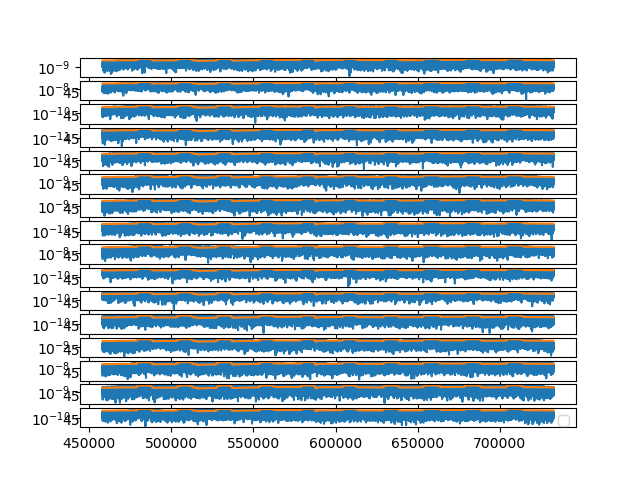

In [5]:
glove = mat['glove']

FS = 2000
N_CH = mat['emg'].shape[1]

rec_duration = mat['emg'].shape[0]/FS
rec_time = np.arange(0,rec_duration, 1/FS)
# print(f"Total recording duration for this subject {subject}: {rec_duration} seconds")
# print(f"Creating time axis: \nbeg {rec_time[:5]} \nend {rec_time[-5:]}\n")
# print(f"sEMG Channels: {N_CH}")

# loading into df for easier handling
emg_df = pd.DataFrame(mat['emg'])
emg_df['time'] = rec_time
emg_df['restimulus'] = mat['restimulus']
emg_df['stimulus'] = mat['stimulus']
emg_df['rerepetition'] = mat['rerepetition']
emg_df['trial'] = (emg_df['stimulus'] != emg_df['stimulus'].shift()).cumsum()
emg_df['glove'] = glove[:,5]
index_finger_ids = emg_df['restimulus'] == 3

emg_index = emg_df.loc[(emg_df['trial']<62) & (emg_df['trial']>=41) ]



first_index_move = emg_df.loc[emg_df['trial']==42]

# convolution_map = np.zeros()

fig, axs = plt.subplots(16)
for i in range(16):
    convolution_channel_1 = np.convolve(emg_index.iloc[:,i],first_index_move.iloc[:,i],'same') 
    emg_index['convolve'] = np.abs(convolution_channel_1)[:]
    axs[i].plot(emg_index['convolve'])
    # axs[i].plot(emg_index['convolve'])
    axs[i].plot(np.max(convolution_channel_1)*(emg_index['glove']/np.max(emg_index['glove'])))
    axs[i].set_yscale('log')
# plt.plot(emg_index['restimulus'],label='restimulus')
# plt.plot(emg_index['stimulus'],label='stimulus')
# # plt.plot(emg_index['trial'])
# plt.plot(emg_index['glove']/np.max(emg_index['glove']),label='glove')
# plt.plot(emg_index['time'][0]+convolution_channel_1,label='channel 1')

plt.legend()
plt.show()
